In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('D:\\JD\\titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


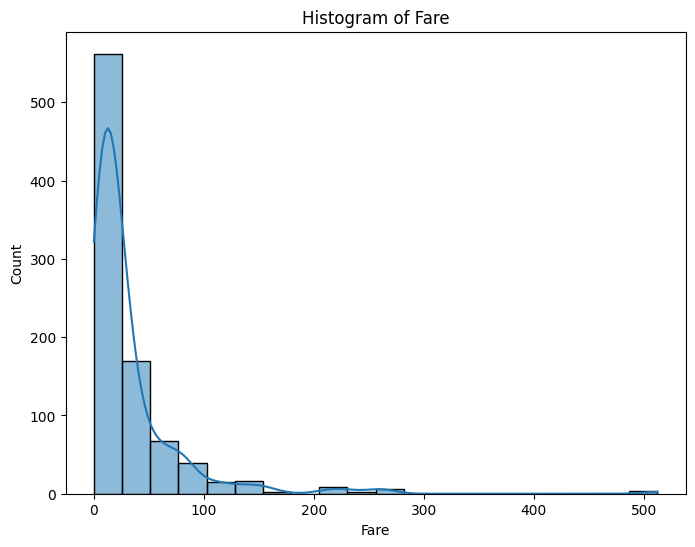

In [17]:
#Uni-Variate

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='fare', bins=20, kde=True)
plt.title('Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

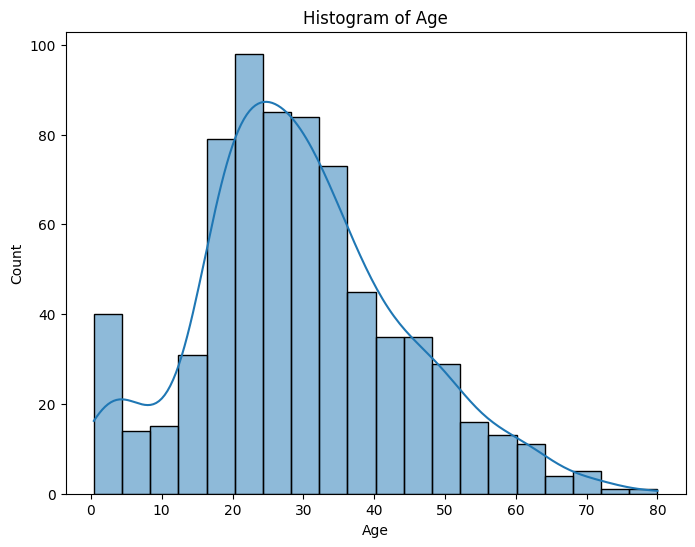

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

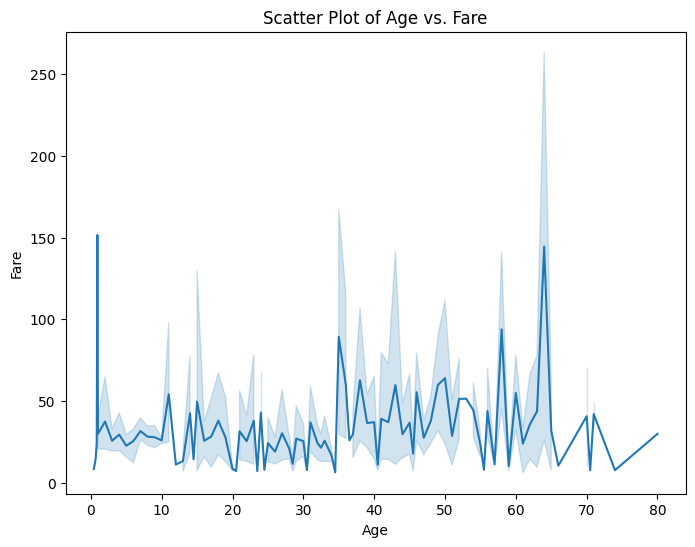

In [21]:
#Bi-Variate

plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='age', y='fare')
plt.title('Scatter Plot of Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

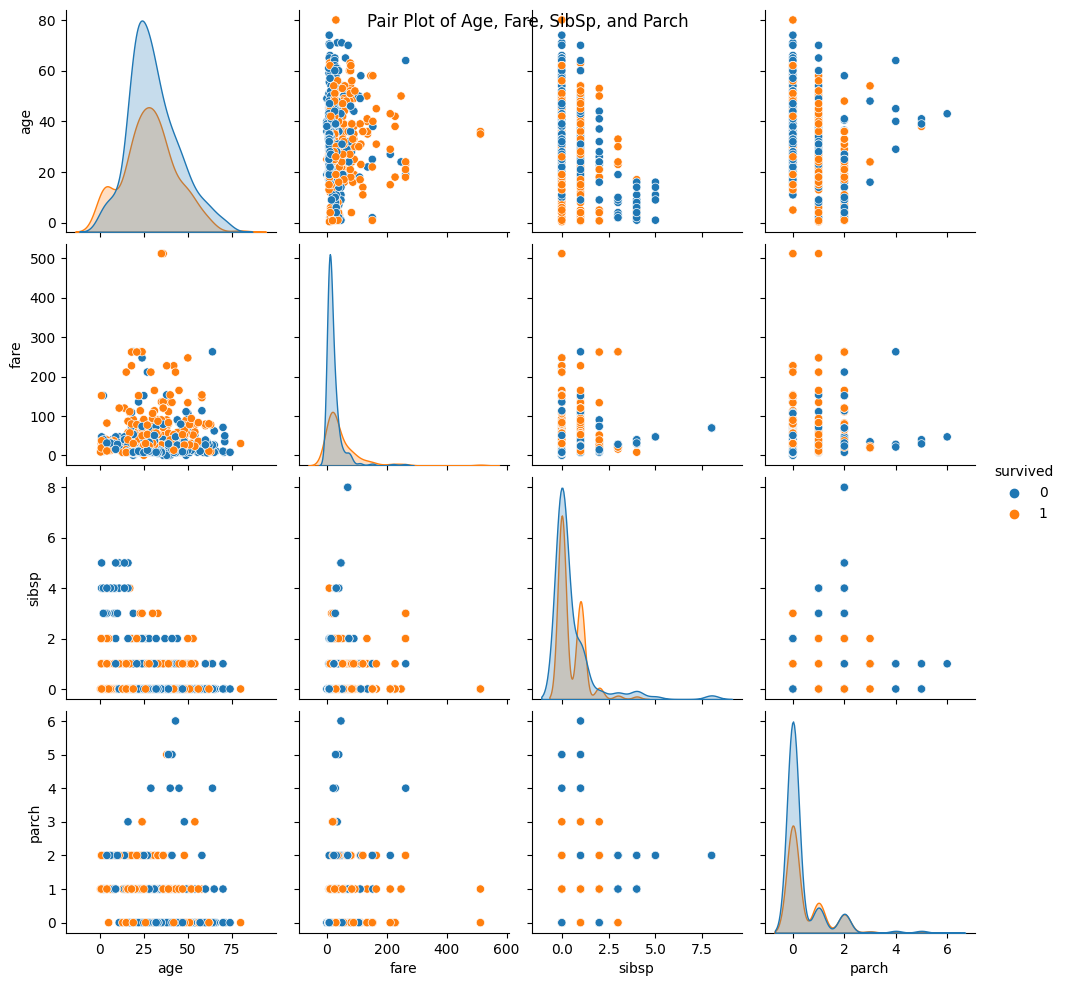

In [22]:
sns.pairplot(data=df, vars=['age', 'fare', 'sibsp', 'parch'], hue='survived')
plt.suptitle('Pair Plot of Age, Fare, SibSp, and Parch')
plt.show()

In [23]:
#Descriptive Statistics

print(df.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [24]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [30]:
median_age = df['age'].median()
df['age'].fillna(median_age, inplace=True)

df.drop('deck', axis=1, inplace=True)



In [28]:
embark_counts = df['embark_town'].value_counts()
print(embark_counts)

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64


In [33]:
df['embark_town'].fillna('Southampton', inplace=True)
df['embarked'].fillna('S', inplace=True)

In [34]:
print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [37]:
Q1 = df[['age', 'fare']].quantile(0.25)
Q3 = df[['age', 'fare']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_age = (df['age'] < lower_bound['age']) | (df['age'] > upper_bound['age'])

outliers_fare = (df['fare'] < lower_bound['fare']) | (df['fare'] > upper_bound['fare'])

median_age = df['age'].median()
df.loc[outliers_age, 'age'] = median_age

median_fare = df['fare'].median()
df.loc[outliers_fare, 'fare'] = median_fare


In [40]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

categorical_cols = ['sex', 'embarked', 'class', 'who', 'embark_town', 'alive']

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


In [42]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,14.4542,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [54]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,1:]
Y = df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=40)